In [37]:
#import all of the libraries that I will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#install the ucimlrepo
pip install ucimlrepo

In [41]:
#pull the dataset from the repo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
#print(adult.metadata) 
  
# variable information 
#print(adult.variables) 

In [48]:
# create the datasets from the given information to visualize the data
df_factors = pd.DataFrame(X)
df_results = pd.DataFrame(y)

In [50]:
df_factors.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [52]:
df_results.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [54]:
# the data is split into 2 sections so I decided to connect the two to get a bettwe unserstanding of the data

df = pd.concat([df_factors, df_results], axis=1, join="inner")

In [56]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [60]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [62]:
# Gave me insight on which categories to not use for my hypothesis
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

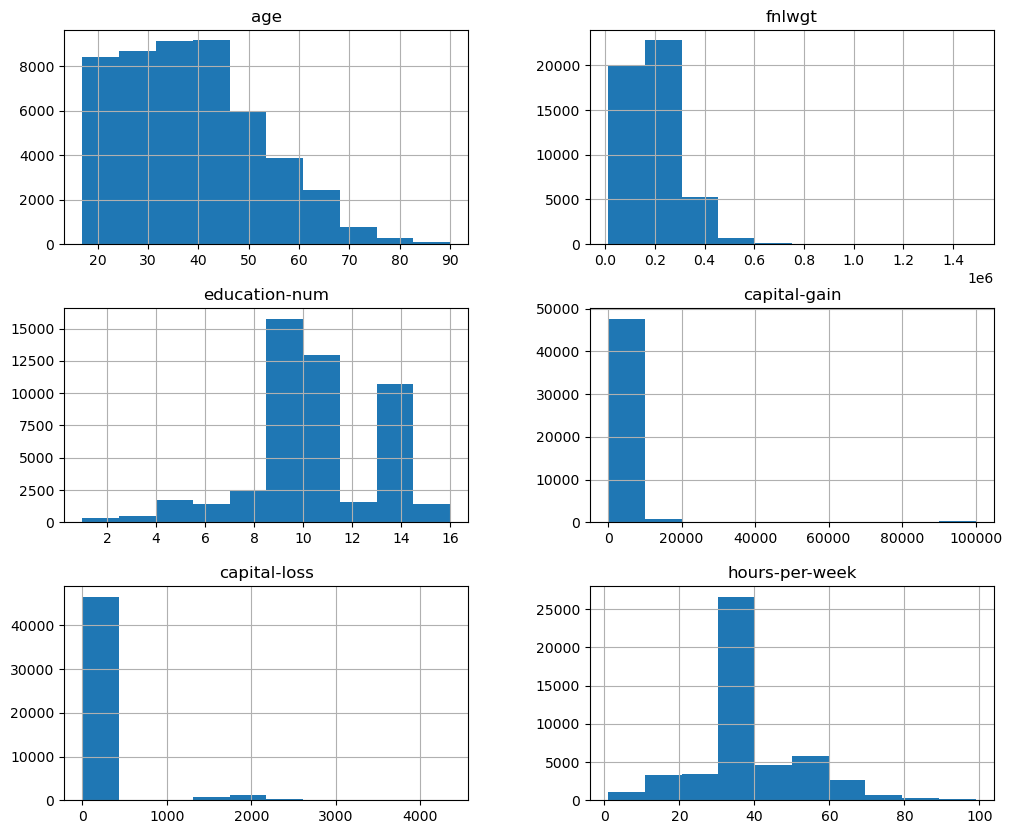

In [64]:
df.hist(figsize=(12, 10))

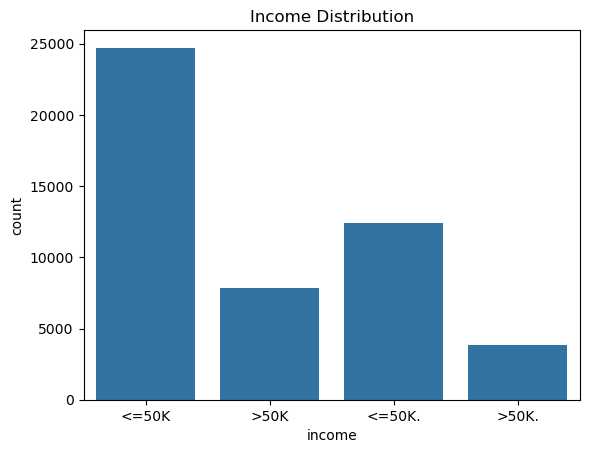

In [66]:
sns.countplot(data=df, x='income')
plt.title("Income Distribution")
plt.show()

In [ ]:
# This data shows that Income Distribution needs cleaning so I will get rid of the "." and plot it again

In [68]:
#Before
print(df['income'].value_counts())

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64


In [70]:
#After
df['income'] = df['income'].str.replace('.', '', regex=False).str.strip()
print(df['income'].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


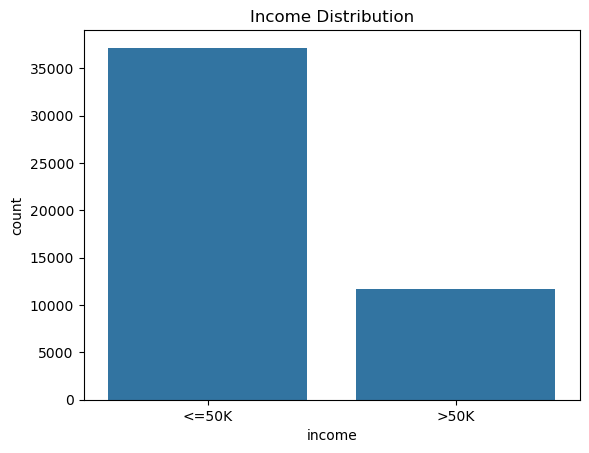

In [72]:
sns.countplot(data=df, x='income')
plt.title("Income Distribution")
plt.show()

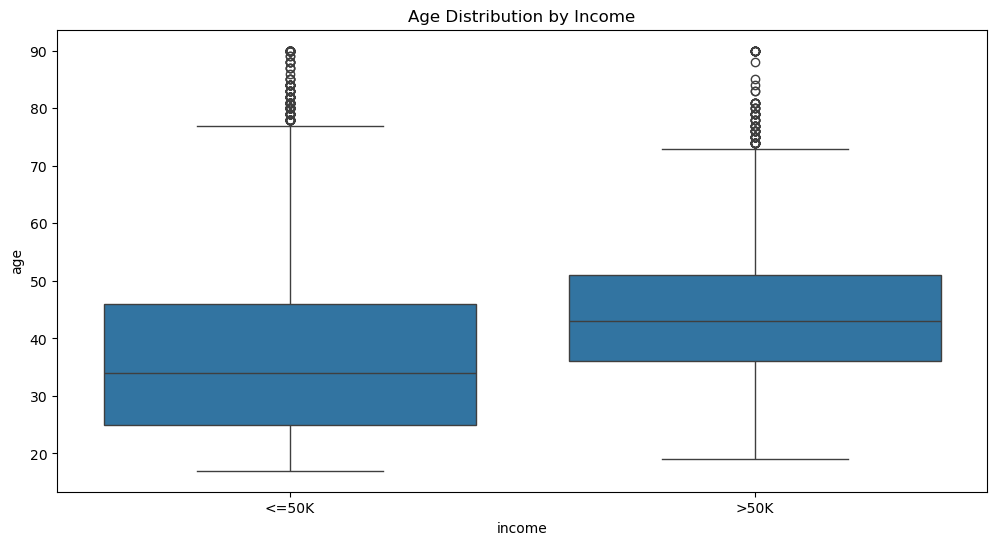

In [74]:
# Visualizing the relationship between age and income
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='age')
plt.title("Age Distribution by Income")
plt.show()

In [76]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 48842
Number of columns: 15


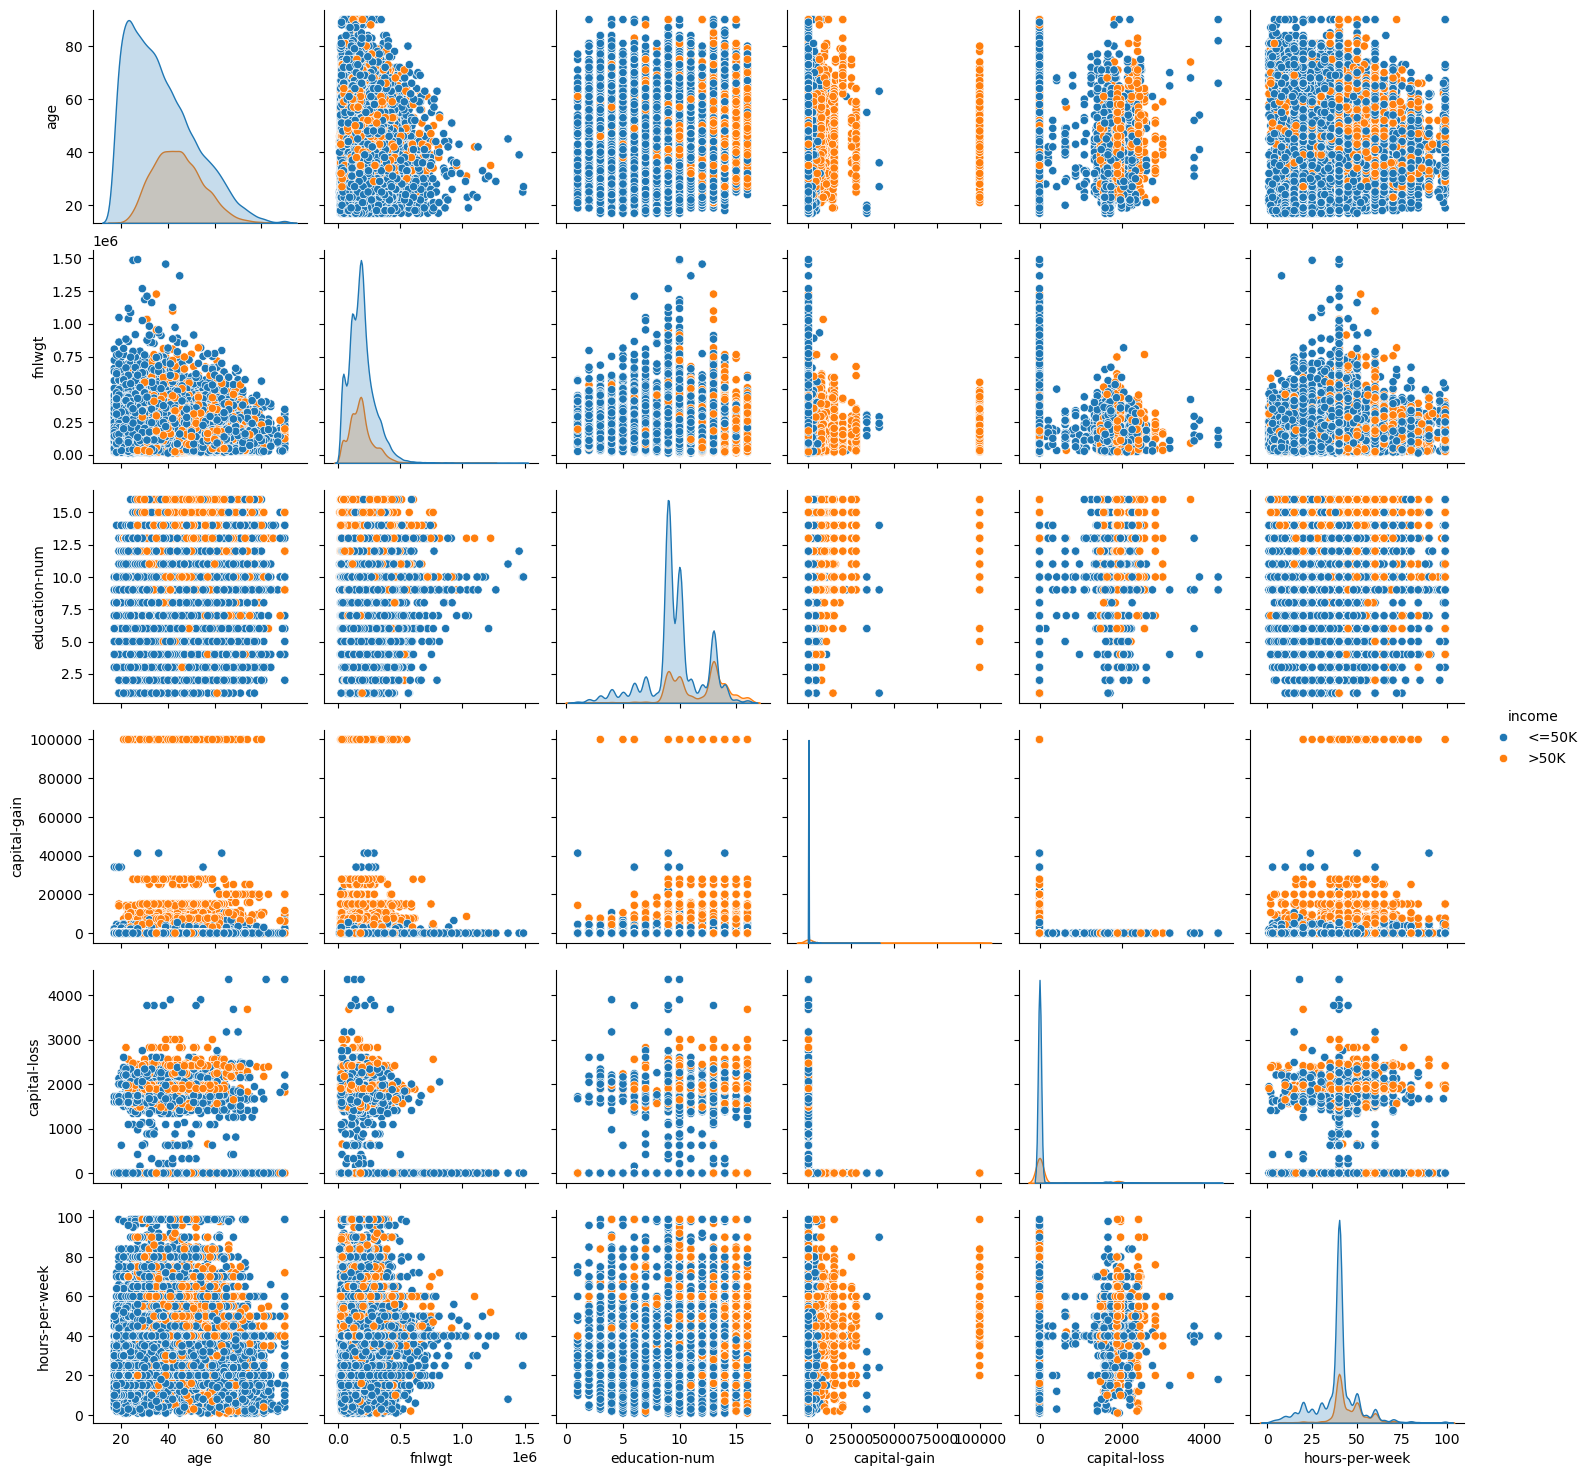

In [188]:
# Pairplot for relationships between numerical features
sns.pairplot(df, hue='income')
plt.show()

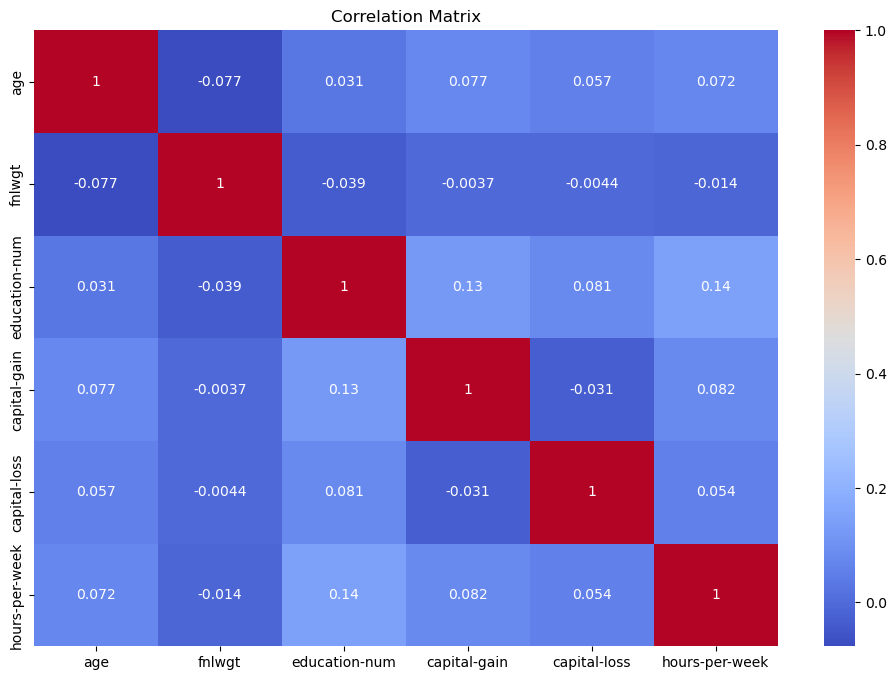

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
#This doesn't show much correlation between the factors

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, y=col, hue='income')
    plt.title(f'{col} Distribution by Income')
    plt.show()

Hypothesis Formulation:

Hypothesis 1: Individuals with higher education levels are more likely to have an income of >50K.
Hypothesis 2: Individuals who work a greater number of hours per week are more likely to have an income of >50K.

Hypothesis 1 testing:

In [86]:
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']


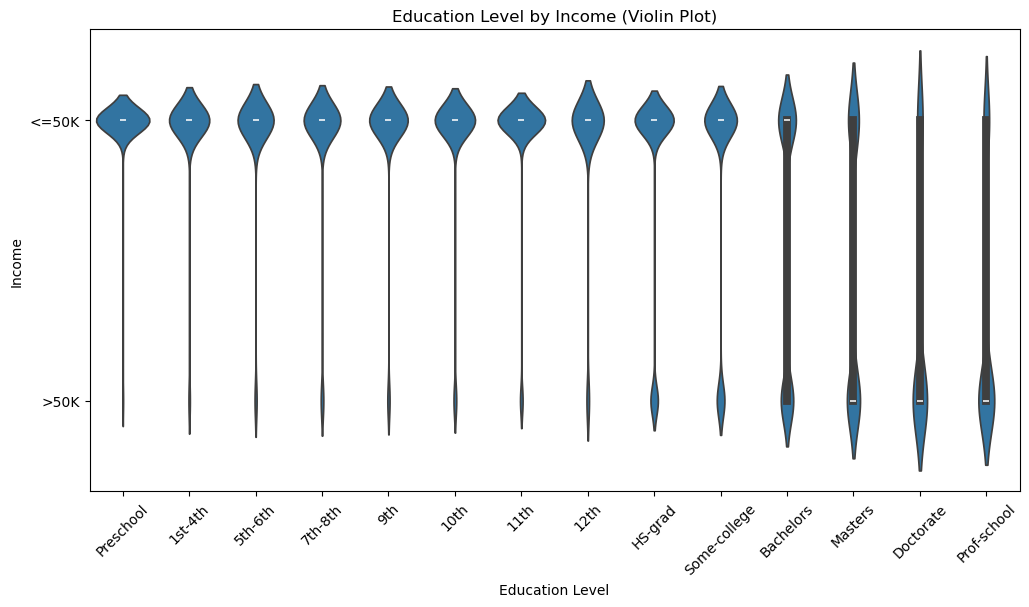

In [88]:
#violin plot of the distribution of education by income
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='education', y='income', order=education_order)
plt.title("Education Level by Income (Violin Plot)")
plt.xlabel("Education Level")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.show()

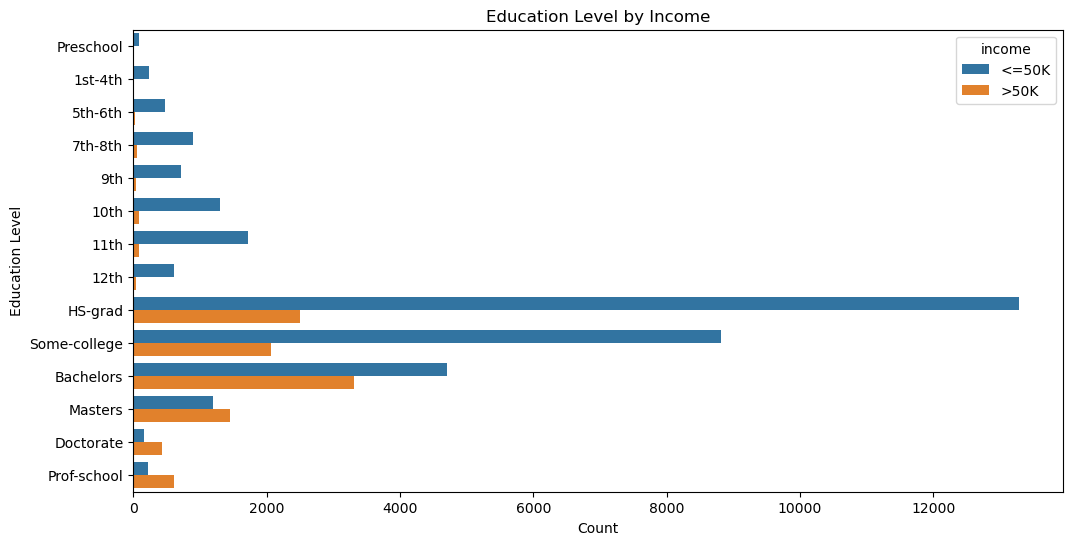

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='education', hue='income', order = education_order)
plt.title("Education Level by Income")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()

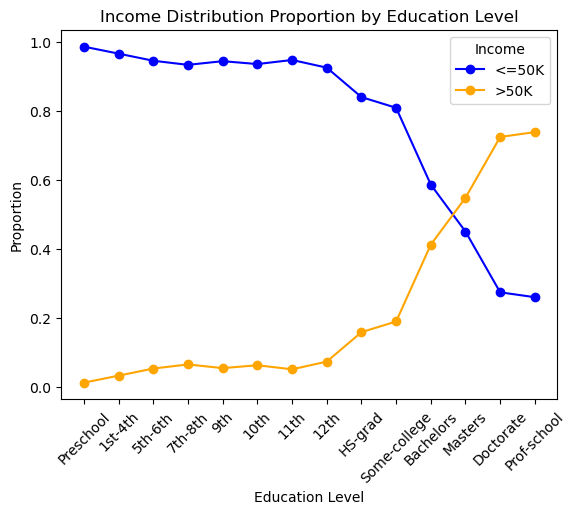

In [92]:
edu_income_counts = df.groupby(['education', 'income']).size().unstack().reindex(education_order)

edu_income_proportions = edu_income_counts.div(edu_income_counts.sum(axis=1), axis=0)


# Line plots for both income groups
plt.plot(edu_income_proportions.index, edu_income_proportions['<=50K'], label='<=50K', marker='o', color='blue')
plt.plot(edu_income_proportions.index, edu_income_proportions['>50K'], label='>50K', marker='o', color='orange')

# Labels and title
plt.title("Income Distribution Proportion by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title='Income')


plt.show()

Hypothesis 1:

Null: There is no relationship between the level of education and the anual income

Alternative: The higher the level of education, the more likely one is to make over 50k.

Results:

These charts show that those with higher education, such as Bachelors, Masters, Prof-school, and Doctorate have a higher likelihood of making more than 50K

Those with a higher level of education, on average, have a much higher likelihood of making more money. 

The income distribution further proves that higher education (specifically past bachelor's) equates to a higher likelihood of making over 50K 

Hypothesis Confirmation:

The distribution chart shows that individuals with higher education levels (e.g., Bachelors, Masters, Doctorate) have a significantly higher proportion of >50K incomes compared to those with lower education levels. 
This supports the hypothesis that higher education is associated with a greater likelihood of earning more than 50K."

Note: I could have used education-num to see the relationship as well but this provides more structure to the data.

Hypothesis 2 testing:

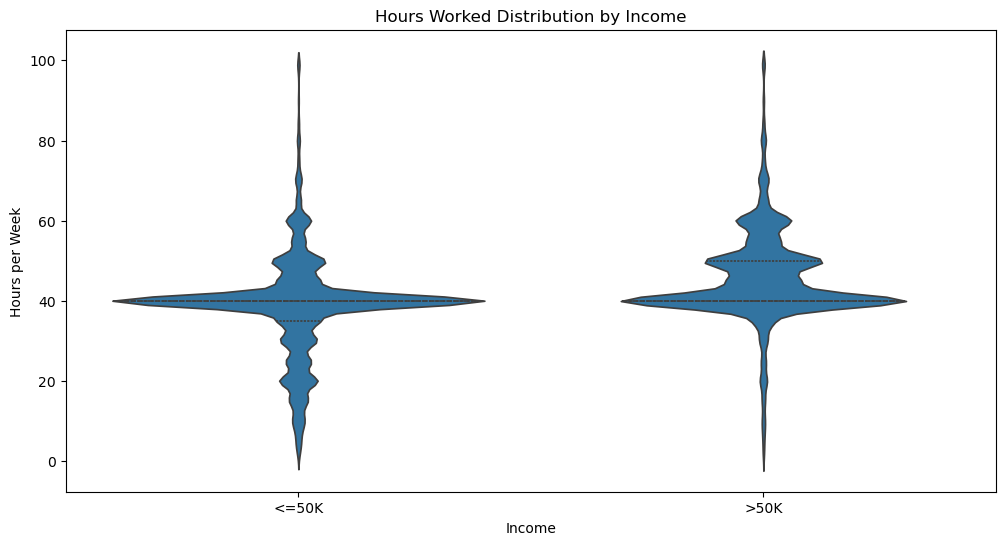

In [98]:
#Violin plot of the distribution of hours worked per week by income
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='income', y='hours-per-week', inner='quartile')
plt.title("Hours Worked Distribution by Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()

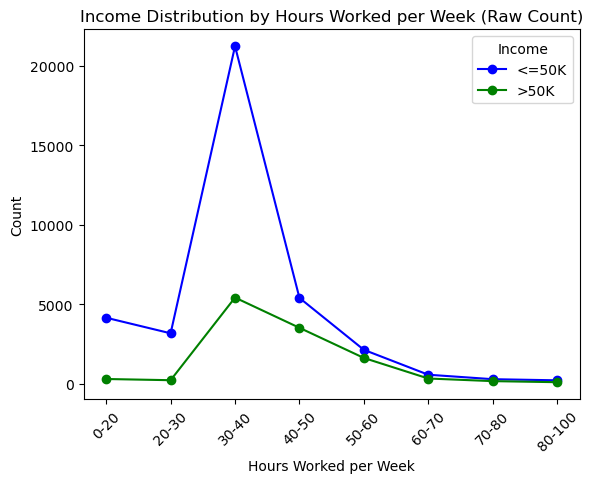

In [118]:
# Create bins for hours worked
hours_bins = pd.cut(df['hours-per-week'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 100], labels=[
    '0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100'
])

# Count occurrences of each hour group by income
hours_income_counts = df.groupby([hours_bins, 'income'], observed = True).size().unstack()

# Line plots for both income groups
plt.plot(hours_income_counts.index, hours_income_counts['<=50K'], label='<=50K', marker='o', color='blue')
plt.plot(hours_income_counts.index, hours_income_counts['>50K'], label='>50K', marker='o', color='green')

# Labels and title
plt.title("Income Distribution by Hours Worked per Week (Raw Count)")
plt.xlabel("Hours Worked per Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Income')

plt.show()

Hypothesis 2:

Null: There is no relationship between the hours worked weekly and the annual income

Alternative: The more hours an individual works per week, the more likely they are to make over 50k.

Results: 

The distribution of hours worked by those who make less than and greater than 50K seems to have a similar split.
Those who make over 50k seem to have a greater distribution of people who work over 40 hours per week but it's not by a large margin.
It is pretty evident that there are very few who make over 50K and work less than 40 hours a week.
The plot for less than 50k seems middle-heavy and has a somewhat uniform distribution to both ends.
The plot for over 50k seems to be less middle-heavy and have a greater distribution over the middle than under.

The second plot shows that the distribution for the two income ranges is very similar.
Both have a peak around 30-40 hours and decrease afterward.
The line for those who make over 50k has a gradual decline, unlike those who make less than 50k. 
The line for those who make less than 50K has a sharp drop after 30-40 hours of work.

Hypothesis Confirmation:

The distribution chart shows that individuals who work a greater number of hours weekly do not make more on average. There is no relationship between the hours an individual works and their weekly income.

Conclusion:

Hypothesis 1:
Conclusion: There is a significant correlation between education level and income range. Indiciduals who have a higer education are more likely to make over 50k annualy.

Hypothesis 2:
Conclusion: There is not enough 